### Import pakietów

In [131]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

### Wczytanie danych wejściowych

In [132]:
data = pd.read_excel('./data/Boston505.xlsx')
test = pd.read_excel('./data/Boston506.xlsx')

In [133]:
data_x = data.drop(columns=['CMEDV'])
data_y = data['CMEDV']

In [134]:
sc=StandardScaler()
data_x_transformed = sc.fit_transform(data_x)
data_x_transformed = pd.DataFrame(data_x_transformed, index=data_x_transformed[:,0])
data_x_transformed.columns = data_x.columns

In [135]:
x = data_x_transformed
y = data_y

### Regresja MNK

In [136]:
model_LR = LinearRegression()

In [137]:
model_LR.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [138]:
model_LR.coef_

array([-0.91395064,  1.1124291 ,  0.15566962,  0.68338672, -2.053749  ,
        2.65999165,  0.01500072, -3.16411107,  2.64041201, -2.1373381 ,
       -1.99876015,  0.84297195, -3.78931386])

In [139]:
model_LR.intercept_

np.float64(22.537227722772272)

In [140]:
coefs = []
for i in range(len(model_LR.coef_)):
    name = x.columns[i]
    coef = model_LR.coef_[i]
    coefs.append(f"{coef:.4} * {name}")

In [141]:
print("Oszacowana liniowa funkcja regresji:")
print("y = ",model_LR.intercept_, " + ", " + ".join(coefs))

Oszacowana liniowa funkcja regresji:
y =  22.537227722772272  +  -0.914 * CRIM + 1.112 * ZN + 0.1557 * INDUS + 0.6834 * CHAS + -2.054 * NOX + 2.66 * RM + 0.015 * AGE + -3.164 * DIS + 2.64 * RAD + -2.137 * TAX + -1.999 * PTRATIO + 0.843 * B + -3.789 * LSTAT


In [142]:
r_2 = r2_score(y, model_LR.predict(x))
print(f"Współczynnik determinacji R^2: {r_2:.0%}")

Współczynnik determinacji R^2: 74%


In [143]:
predictions = model_LR.predict(test)
predictions

array([-547.16952559])

### Regresja liniowa Metoda gradientowa

In [144]:
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [145]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product btween weight and input
    return np.array(y_lst)

In [146]:
#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

In [147]:
weight_vector=np.random.rand(data_x.shape[1])
intercept=0
learning_rate=0.001

In [148]:
# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

In [149]:
def gradient_descent(x, y):
    weight_vector = np.random.randn(x.shape[1])
    intercept = 0
    epoch = 2000
    n = len(x)
    linear_loss = []
    learning_rate = 0.001
    for i in range(epoch):
        y_predicted = predicted_y(weight_vector, x, intercept)
        weight_vector = weight_vector - learning_rate * dldw(x, y, y_predicted)
        intercept = intercept - learning_rate * dldb(y, y_predicted) # Uwaga: dldb nie jest zdefiniowane na obrazkach
        linear_loss.append(loss(y, y_predicted))
    plt.plot(np.arange(1, epoch), linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")

    return weight_vector, intercept 

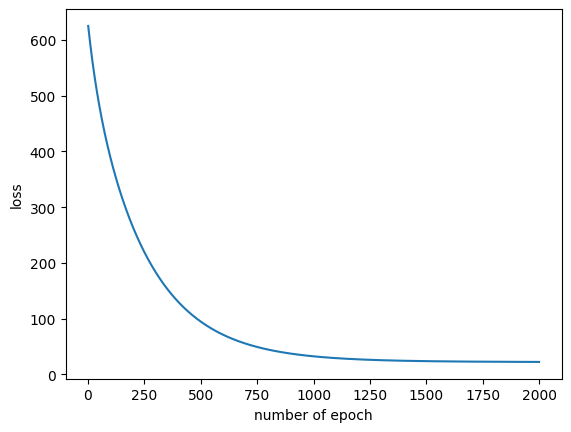

In [150]:
w, b = gradient_descent(np.array(x), y)

In [151]:
coefs = []
for i in range(len(weight_vector)):
    x = data_x.columns[i]
    coef = weight_vector[i]
    coefs.append(f"{coef:.4} * {x}")

In [152]:
print("Oszacowana liniowa funkcja regresji:")
print("y =", intercept, " + ", " + ".join(coefs))

Oszacowana liniowa funkcja regresji:
y = 0  +  0.1849 * CRIM + 0.9696 * ZN + 0.7751 * INDUS + 0.9395 * CHAS + 0.8948 * NOX + 0.5979 * RM + 0.9219 * AGE + 0.08849 * DIS + 0.196 * RAD + 0.04523 * TAX + 0.3253 * PTRATIO + 0.3887 * B + 0.2713 * LSTAT


In [153]:
# r_2 = r2_score(y, predicted_y(w, np.array(x), b))
# print(f"Współczynnik determinacji R^2: {r_2:.0%}")

### Regresja liniowa MNW

In [154]:
x = data_x
y = data_y
t = test

In [155]:
initials = [1] * (data_x.shape[1] + 1)
initials.append(0.25)  # initial sigma value

In [156]:
res = minimize(nll, x0=initials, args = (data_x, data_y), method='Nelder-Mead')
intercept = res.x[0]
params = res.x[1:-1]
sigma = res.x[-1]

In [157]:
coefs = []
for i in range(len(w)):
    name = x.columns[i]  # Zakłada, że 'x' to pandas DataFrame
    coef = w[i]
    coefs.append(f"{coef:.4} * {name}")

In [158]:
print("Oszacowana liniowa funkcja regresji:")
print("y =", intercept, " + ", " + ".join(coefs))

Oszacowana liniowa funkcja regresji:
y = 5.981759053469953  +  -0.5723 * CRIM + 0.514 * ZN + -0.04254 * INDUS + 0.837 * CHAS + -1.668 * NOX + 3.191 * RM + -0.1508 * AGE + -2.304 * DIS + 0.6201 * RAD + -0.2732 * TAX + -1.915 * PTRATIO + 0.8303 * B + -3.398 * LSTAT


In [159]:

r_2 = r2_score(y, predicted_y(params,np.array(x), intercept))
print(f"Współczynnik determinacji R^2: {r_2:.0%}")

Współczynnik determinacji R^2: -385%


### Sieci neuronowe MLPRegressor

In [165]:
x = data_x
y = data_y
t = test

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1, activation='relu', hidden_layer_sizes=(100,))
regr.fit(x_train, y_train)
print(regr.predict(test))
r_2 = regr.score(x_test, y_test)
print(f"Współczynnik determinacji R^2 = {r_2:.0%}")

[19.76235957]
Współczynnik determinacji R^2 = 64%


### Sieci neuronowe

In [161]:
x = data_x
y = data_y
t = test

In [167]:
class NeuralNetwork:

    def __init__(self, input_size, output_size, show = False):
        np.random.seed(42)
        self.show = show
        if self.show: print("Parametry tworzonej sieci:", "\n")
        self.input_size = input_size
        self.output_size = output_size
        if self.show:
            print("Liczba neuronów wejściowych: ", input_size)
            print("Liczba neuronów wyjściowych: ", output_size)
        self.weights_input_output = np.random.randn(self.input_size, self.output_size)
        self.bias_output = np.random.randn(1, self.output_size)
        if self.show:
            print("\nWagi neuronów wyjściowych:")
            print(self.weights_input_output)
            print("\nWartości progowe neuronów wyjściowych:")
            print(self.bias_output)
            print("\n------------------------------\n")

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def feedforward(self, X):
        if self.show: print("Wektor wejściowy: ", X)
        self.output_activation = np.dot(X, self.weights_input_output) + self.bias_output
        if self.show: print("Zagregowane wartości wejściowe dla neuronów wyjściowych: ", self.output_activation)
        self.predicted_output = self.sigmoid(self.output_activation)
        if self.show: print("Wartości wyjściowe neuronów ukrytych: ", self.predicted_output)
        return self.predicted_output
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def backward(self, X, y, learning_rate):
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)
        
        # Aktualizacja wag i biasów
        self.weights_input_output += np.dot(X.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            
            if epoch % 4000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoka {epoch}, Loss:{loss}")
                r_2 = r2_score(y, output)
                print(f"Współczynnik determinacji R^2: {r_2:.0%}")


In [164]:
nn = NeuralNetwork(input_size=x.shape[1], output_size=1, show=False)
nn.train(np.array(x), np.array(y).reshape(-1, 1), epochs=20000, learning_rate=0.01) 

Epoka 0, Loss:553.0067444817313
Współczynnik determinacji R^2: -556%
Epoka 4000, Loss:548.1290495049504
Współczynnik determinacji R^2: -550%
Epoka 8000, Loss:548.1290495049504
Współczynnik determinacji R^2: -550%
Epoka 12000, Loss:548.1290495049504
Współczynnik determinacji R^2: -550%
Epoka 16000, Loss:548.1290495049504
Współczynnik determinacji R^2: -550%
